# Task
Build a regression model to predict car selling prices using the `car_details.csv` dataset, including data loading, exploration, preprocessing, model training, and evaluation.

## Load Dataset

### Subtask:
Load the `car_details.csv` dataset into a pandas DataFrame to begin the analysis.


 importing the pandas library, which is essential for working with DataFrames in Python and load the `car_details.csv` dataset into a DataFrame named `df` using `pd.read_csv()` and display the first few rows to confirm the data has been loaded correctly.



In [1]:
import pandas as pd
df = pd.read_csv('/content/car_details.csv')
print("Dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Data Exploration and Visualization

### Subtask:
Perform initial data exploration to understand the distribution of features, identify potential outliers, and visualize relationships between features and the target variable ('selling_price'). This will involve generating histograms, scatter plots, and correlation matrices.


 Displaying basic descriptive statistics of the DataFrame to get an overview of numerical features and printing
 its information to inspect data types and identify non-null counts. This provides an initial understanding of the dataset's structure and content.



In [2]:
print("Descriptive statistics for numerical features:")
print(df.describe())
print("\nDataFrame information:")
df.info()

Descriptive statistics for numerical features:
              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.00


Based on the previous output, the target variable as 'Price'. identify the numerical columns from the `df.info()` output, and then create histograms to visualize the distribution of these numerical features, paying special attention to the 'Price' column to understand its distribution and identify potential outliers.



Generating histograms for numerical features...


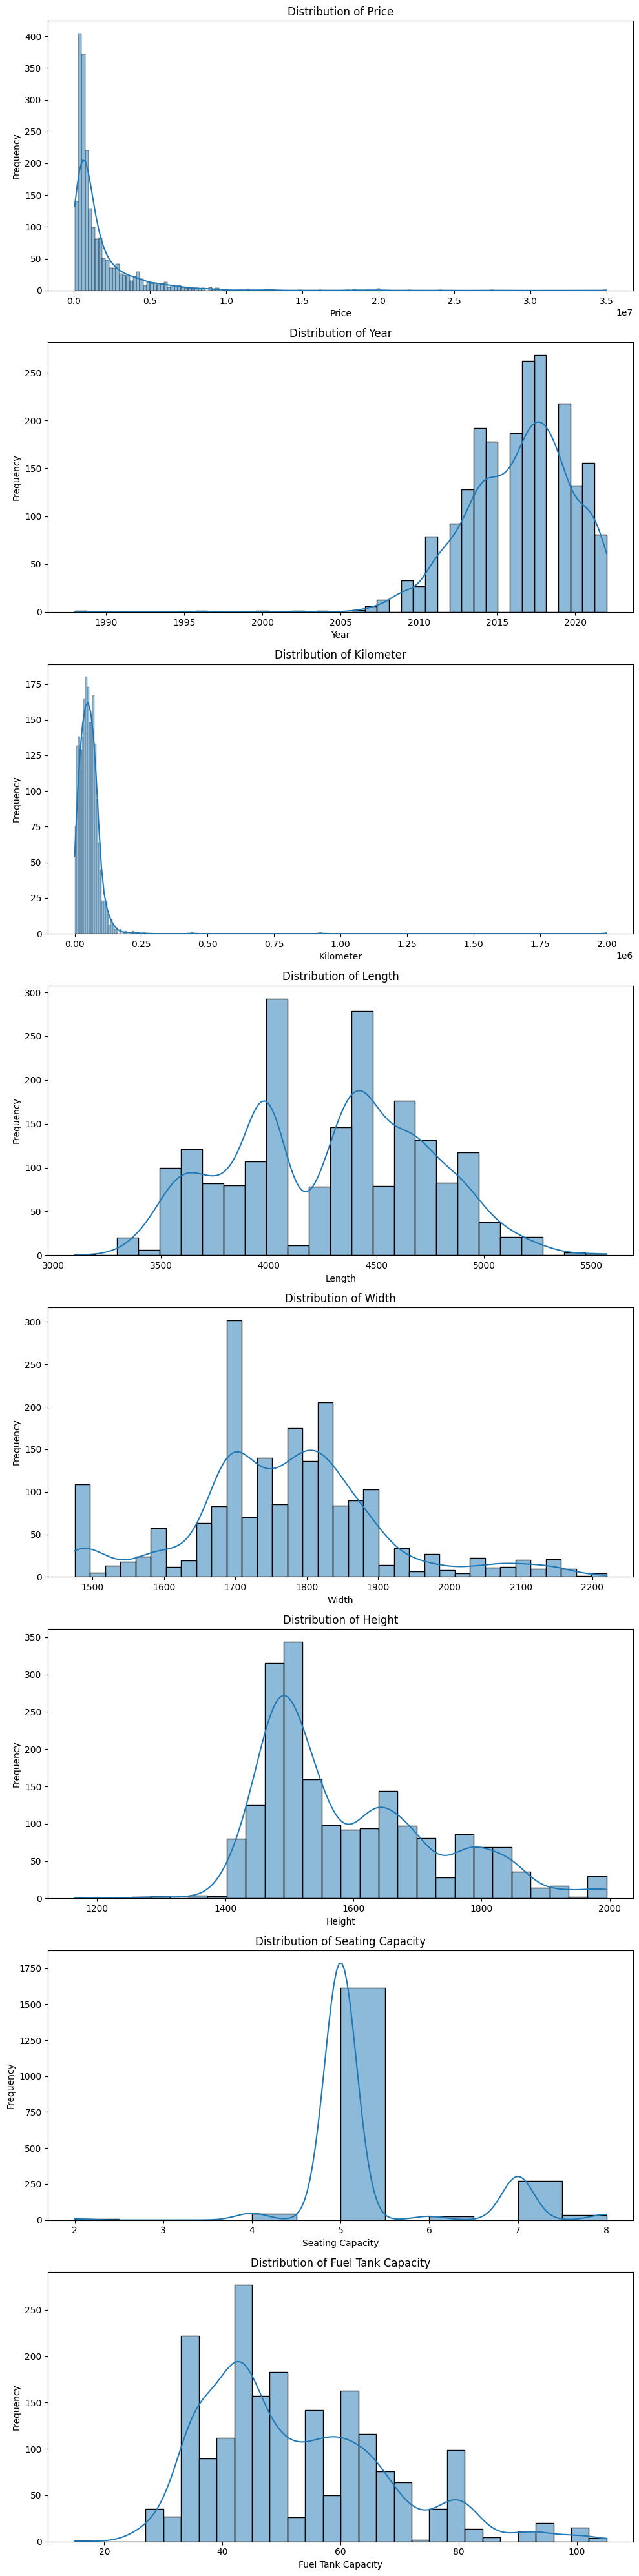

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding 'Price' for now, as it's the target)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Price' in numerical_cols:
    numerical_cols.remove('Price')

# Add 'Price' back to the list of numerical columns for plotting, often it's good to see its distribution first
numerical_cols.insert(0, 'Price')

print("Generating histograms for numerical features...")

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 5 * len(numerical_cols)))
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Now that the histograms for numerical features have been plotted,proceed to create scatter plots to visualize the relationship between each numerical feature and the 'Price' column. This will help in understanding potential correlations and trends with the target variable.



Generating scatter plots for numerical features vs. Price...


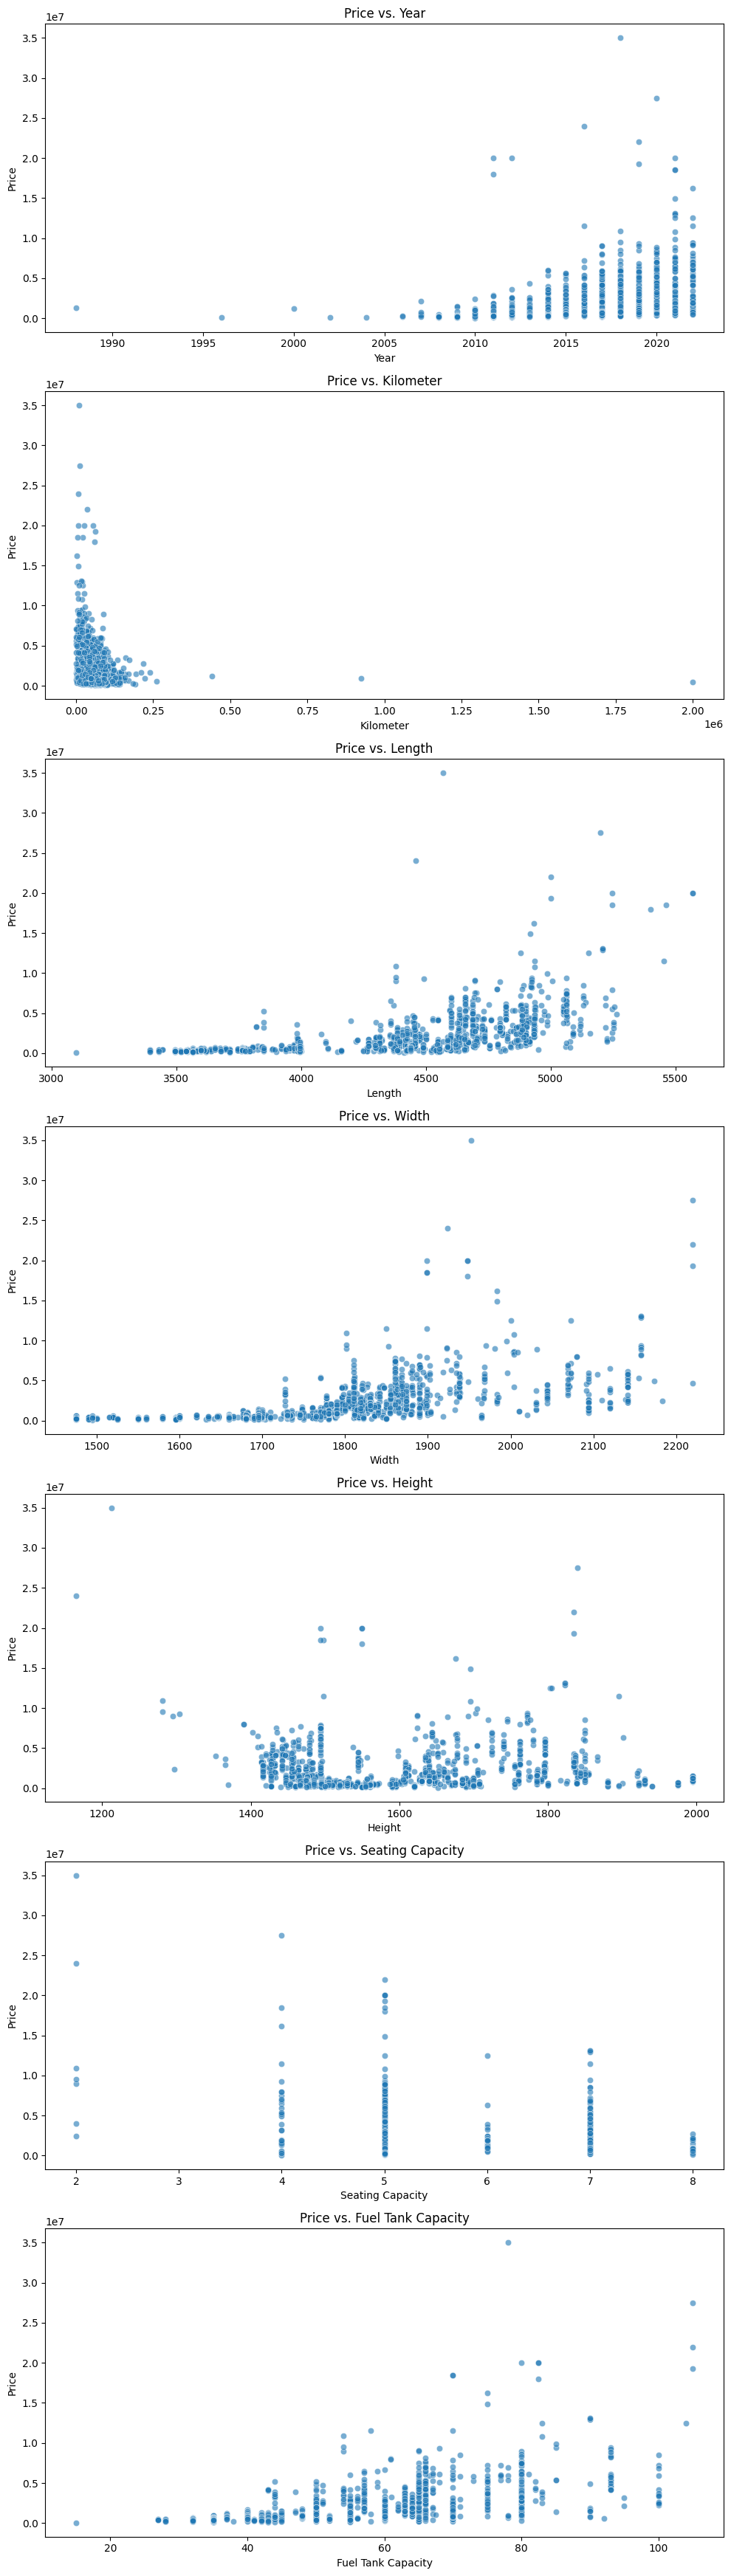

In [4]:
print("Generating scatter plots for numerical features vs. Price...")

# Identify numerical columns for scatter plots (excluding 'Price' itself)
scatter_numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Price' in scatter_numerical_cols:
    scatter_numerical_cols.remove('Price')

# Plot scatter plots for numerical features against 'Price'
fig, axes = plt.subplots(nrows=len(scatter_numerical_cols), ncols=1, figsize=(10, 5 * len(scatter_numerical_cols)))
axes = axes.flatten() if len(scatter_numerical_cols) > 1 else [axes]

for i, col in enumerate(scatter_numerical_cols):
    sns.scatterplot(x=df[col], y=df['Price'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Price vs. {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()


Now that scatter plots have been generated, the next logical step is to visualize the correlation matrix for all numerical features, including 'Price', using a heatmap. This will provide a comprehensive view of the linear relationships between all numerical variables.



Generating correlation matrix and heatmap for numerical features...


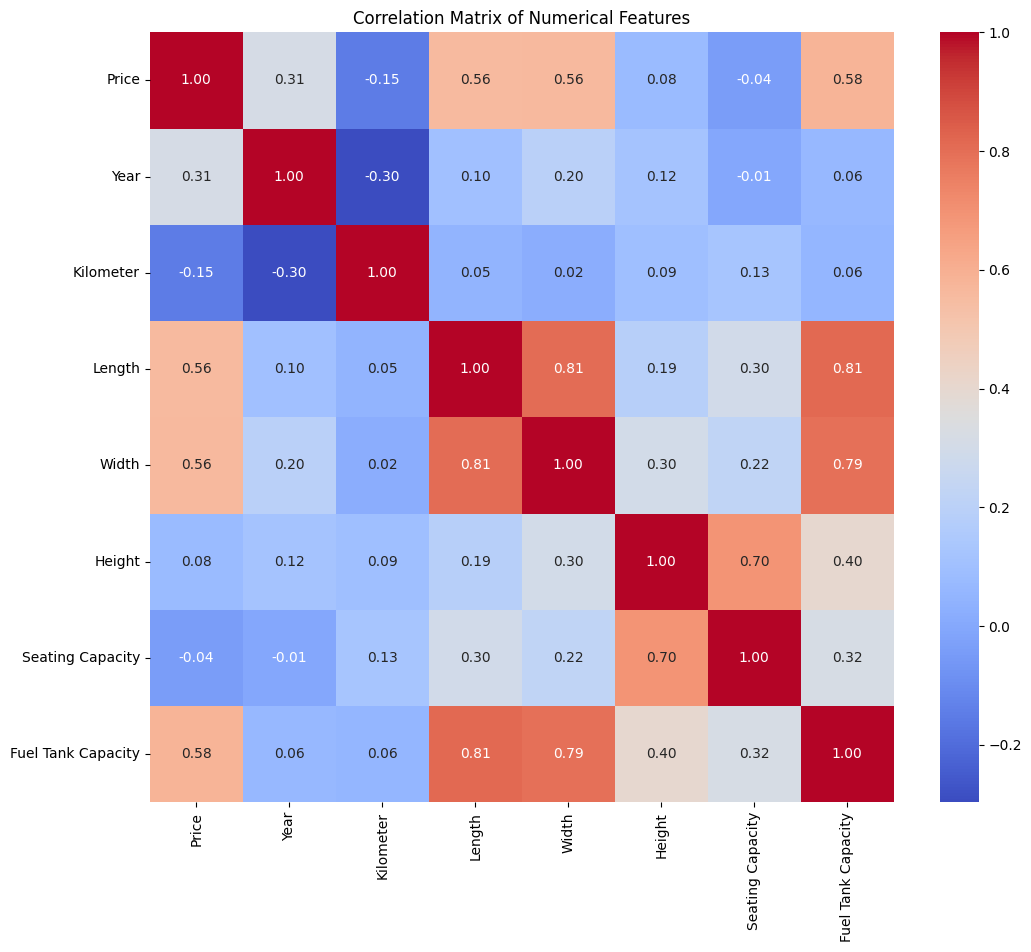

In [5]:
print("Generating correlation matrix and heatmap for numerical features...")

# Calculate the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Now that numerical features have been explored with histograms, scatter plots, and a correlation matrix, identify categorical columns and display their unique values and counts to understand their distribution and variety


In [6]:
print("Displaying unique values and counts for categorical features...")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':")
    print(df[col].value_counts())


Displaying unique values and counts for categorical features...

Unique values and counts for 'Make':
Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
MG                17
Jaguar            17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Lamborghini        1
Ferrari            1
Name: count, dtype: int64

Unique values and counts for 'Model':
Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
Fortuner 2.8 4x2 AT [2016-2020]    13
City V         

## Handle Missing Values and Outliers

### Subtask:
Identify and handle missing values in various columns, particularly cleaning and converting 'Engine', 'Max Power', and 'Max Torque' to numerical types before imputation. Also, visualize and discuss strategies for handling outliers in 'Price' and 'Kilometer'.



define a function to extract numerical values from the 'Engine' column and apply it to convert the column to a numeric data type. This is crucial for handling missing values and preparing the data for imputation.



In [7]:
import numpy as np

def clean_engine(engine_str):
    if pd.isna(engine_str): # Handle NaN values directly
        return np.nan
    try:
        # Extract numerical part, assuming 'cc' is present
        return float(engine_str.replace('cc', '').strip().replace(',', ''))
    except:
        return np.nan # Return NaN for unparseable strings

print("Cleaning 'Engine' column...")
df['Engine'] = df['Engine'].apply(clean_engine)

print("Converting 'Engine' column to numeric...")
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

print("'Engine' column cleaned and converted to numeric.")
print(df[['Engine']].head())

Cleaning 'Engine' column...
Converting 'Engine' column to numeric...
'Engine' column cleaned and converted to numeric.
   Engine
0  1198.0
1  1248.0
2  1197.0
3  1197.0
4  2393.0


 now define a function to extract numerical values from the 'Max Power' column, handle any conversion errors, and then apply this function to convert the column to a numeric data type.



In [8]:
def clean_max_power(power_str):
    if pd.isna(power_str): # Handle NaN values directly
        return np.nan
    try:
        # Extract numerical part, assuming 'bhp' is present and can have '@' sign
        power_str = power_str.lower().replace('bhp', '').replace('@', '').strip()
        return float(power_str.split(' ')[0]) # Take the first numerical value if multiple present
    except:
        return np.nan # Return NaN for unparseable strings

print("Cleaning 'Max Power' column...")
df['Max Power'] = df['Max Power'].apply(clean_max_power)

print("Converting 'Max Power' column to numeric...")
df['Max Power'] = pd.to_numeric(df['Max Power'], errors='coerce')

print("'Max Power' column cleaned and converted to numeric.")
print(df[['Max Power']].head())

Cleaning 'Max Power' column...
Converting 'Max Power' column to numeric...
'Max Power' column cleaned and converted to numeric.
   Max Power
0       87.0
1       74.0
2       79.0
3       82.0
4      148.0


define a function to extract numerical values from the 'Max Torque' column, handle any conversion errors, and then apply this function to convert the column to a numeric data type.



In [9]:
def clean_max_torque(torque_str):
    if pd.isna(torque_str): # Handle NaN values directly
        return np.nan
    try:
        # Extract numerical part, assuming 'Nm' is present and can have '@' sign
        torque_str = torque_str.lower().replace('nm', '').replace('@', '').strip()
        # Some values might have a range (e.g., '200 - 300 Nm'), take the first part if so
        return float(torque_str.split(' ')[0])
    except:
        return np.nan # Return NaN for unparseable strings

print("Cleaning 'Max Torque' column...")
df['Max Torque'] = df['Max Torque'].apply(clean_max_torque)

print("Converting 'Max Torque' column to numeric...")
df['Max Torque'] = pd.to_numeric(df['Max Torque'], errors='coerce')

print("'Max Torque' column cleaned and converted to numeric.")
print(df[['Max Torque']].head())

Cleaning 'Max Torque' column...
Converting 'Max Torque' column to numeric...
'Max Torque' column cleaned and converted to numeric.
   Max Torque
0    109.0000
1    190.0000
2    112.7619
3    113.0000
4    343.0000



Now that 'Engine', 'Max Power', and 'Max Torque' columns have been cleaned and converted to numeric, proceed to fill missing values in these and other specified numerical columns ('Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity') using the median of each respective column.



In [10]:
print("Filling missing values in specified numerical columns with their medians...")

# List of numerical columns to impute with median
numerical_cols_to_impute = [
    'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
    'Seating Capacity', 'Fuel Tank Capacity'
]

for col in numerical_cols_to_impute:
    if df[col].isnull().any(): # Check if there are any missing values in the column
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' filled with median: {median_val}")

print("Missing values imputation for numerical columns complete.")

Filling missing values in specified numerical columns with their medians...
Missing values in 'Engine' filled with median: 1498.0
Missing values in 'Max Power' filled with median: 120.0
Missing values in 'Max Torque' filled with median: 240.0
Missing values in 'Length' filled with median: 4370.0
Missing values in 'Width' filled with median: 1770.0
Missing values in 'Height' filled with median: 1545.0
Missing values in 'Seating Capacity' filled with median: 5.0
Missing values in 'Fuel Tank Capacity' filled with median: 50.0
Missing values imputation for numerical columns complete.


/tmp/ipython-input-504635200.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)



The previous code produced a `FutureWarning` due to the use of `inplace=True` with chained assignment. so update the `.fillna()` method to directly assign the result back to the column, `df[col] = df[col].fillna(median_val)`, to resolve this warning and ensure proper DataFrame modification.



In [11]:
print("Filling missing values in specified numerical columns with their medians...")

# List of numerical columns to impute with median
numerical_cols_to_impute = [
    'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
    'Seating Capacity', 'Fuel Tank Capacity'
]

for col in numerical_cols_to_impute:
    if df[col].isnull().any(): # Check if there are any missing values in the column
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Missing values in '{col}' filled with median: {median_val}")

print("Missing values imputation for numerical columns complete.")

Filling missing values in specified numerical columns with their medians...
Missing values imputation for numerical columns complete.



Now that numerical columns have had their missing values imputed, I will proceed to fill missing values in the categorical 'Drivetrain' column with its mode (most frequent value), as per the instructions.



In [12]:
print("Filling missing values in 'Drivetrain' column with its mode...")

if df['Drivetrain'].isnull().any():
    mode_drivetrain = df['Drivetrain'].mode()[0] # .mode() returns a Series, take the first value
    df['Drivetrain'] = df['Drivetrain'].fillna(mode_drivetrain)
    print(f"Missing values in 'Drivetrain' filled with mode: {mode_drivetrain}")
else:
    print("'Drivetrain' column has no missing values.")

print("Missing values imputation for 'Drivetrain' column complete.")

Filling missing values in 'Drivetrain' column with its mode...
Missing values in 'Drivetrain' filled with mode: FWD
Missing values imputation for 'Drivetrain' column complete.



To verify that all missing values print the count of missing values for all columns in the DataFrame using `df.isnull().sum()`.



In [13]:
print("Verifying missing values after imputation:")
print(df.isnull().sum())

Verifying missing values after imputation:
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64



Now that all missing values have been handled and verified and  create box plots for the 'Price' and 'Kilometer' columns to visually identify the presence and extent of outliers



Generating box plots for 'Price' and 'Kilometer' to identify outliers...


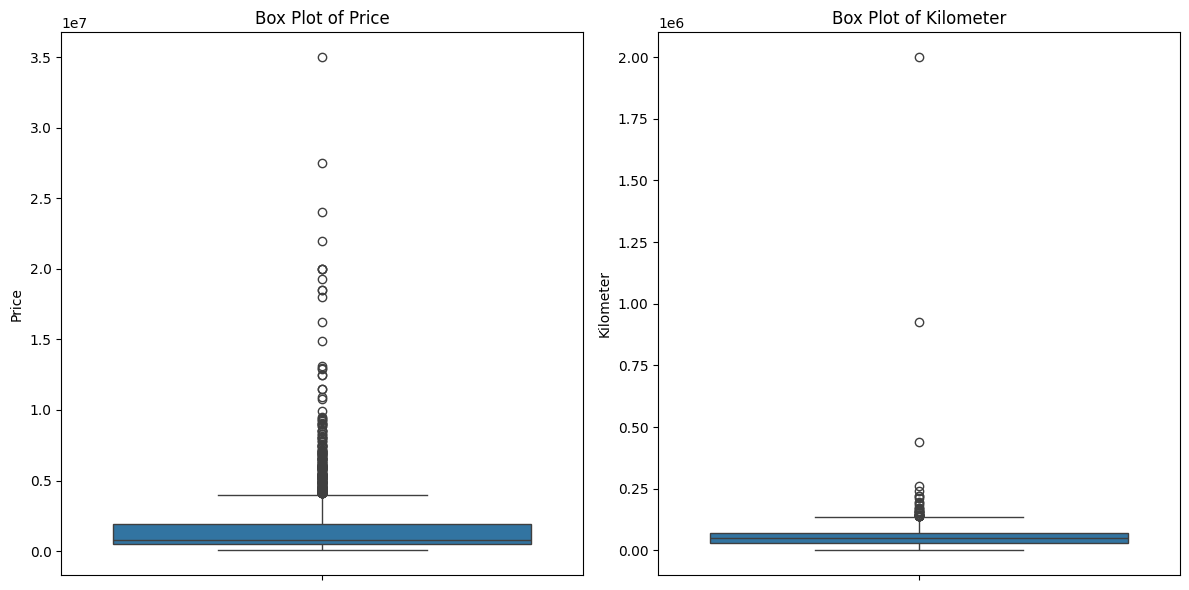

In [14]:
print("Generating box plots for 'Price' and 'Kilometer' to identify outliers...")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Kilometer'])
plt.title('Box Plot of Kilometer')
plt.ylabel('Kilometer')

plt.tight_layout()
plt.show()

###  Outlier Handling for 'Price'

The box plot for 'Price' clearly indicates a **highly skewed distribution to the right**, with a significant number of data points classified as outliers far above the upper quartile. This non-normal, skewed distribution can negatively impact the performance of many regression models, which often assume normally distributed errors or features. The presence of these extreme outliers can unduly influence the model, leading to biased parameter estimates and reduced predictive accuracy.

**Log transformation** (e.g., `np.log1p(df['Price'])` or `np.log(df['Price'])`) is a common and effective technique to address such issues:

1.  **Reduces Skewness**: It compresses the range of higher values while expanding the range of lower values, thereby making the distribution more symmetrical and closer to a normal distribution. This is beneficial for models that perform better with normally distributed data.
2.  **Mitigates Outlier Impact**: By reducing the magnitude of larger values, log transformation lessens the influence of extreme outliers on the model, making the model more robust to these values.
3.  **Addresses Heteroscedasticity**: It can help stabilize the variance of the residuals, a phenomenon known as heteroscedasticity, which is often observed in financial data like car prices where variability tends to increase with the mean.

For regression models, transforming the target variable 'Price' can lead to a more linear relationship with the features and improve model assumptions, ultimately resulting in a more accurate and stable predictive model. Therefore, a log transformation is a strong candidate for preprocessing the 'Price' column before model training.

## Feature Engineering and Encoding

### Subtask:
Engineer new features if necessary and encode categorical variables using appropriate techniques (e.g., one-hot encoding, label encoding) to prepare the data for model training.



The 'Price' column shows significant skewness and outliers, as observed from the box plot. Applying a log1p transformation will help normalize its distribution and reduce the impact of extreme values, which is beneficial for regression models.



In [15]:
print("Applying log1p transformation to 'Price' column...")
df['Log_Price'] = np.log1p(df['Price'])

print("'Log_Price' column created. Displaying the first 5 rows with original Price and Log_Price:")
print(df[['Price', 'Log_Price']].head())

Applying log1p transformation to 'Price' column...
'Log_Price' column created. Displaying the first 5 rows with original Price and Log_Price:
     Price  Log_Price
0   505000  13.132316
1   450000  13.017005
2   220000  12.301387
3   799000  13.591117
4  1950000  14.483340


apply a log1p transformation to the 'Kilometer' column to reduce its skewness and the impact of outliers, which can improve model performance.



In [16]:
print("Applying log1p transformation to 'Kilometer' column...")
df['Log_Kilometer'] = np.log1p(df['Kilometer'])

print("'Log_Kilometer' column created. Displaying the first 5 rows with original Kilometer and Log_Kilometer:")
print(df[['Kilometer', 'Log_Kilometer']].head())

Applying log1p transformation to 'Kilometer' column...
'Log_Kilometer' column created. Displaying the first 5 rows with original Kilometer and Log_Kilometer:
   Kilometer  Log_Kilometer
0      87150      11.375398
1      75000      11.225257
2      67000      11.112463
3      37500      10.532123
4      69000      11.141876


 create a new feature 'Car_Age' by subtracting the 'Year' column from the maximum year present in the dataset, which serves as a proxy for the current year.



In [17]:
print("Creating 'Car_Age' feature...")
current_year = df['Year'].max() # Using the latest year in the dataset as the 'current' year
df['Car_Age'] = current_year - df['Year']

print("'Car_Age' column created. Displaying the first 5 rows with 'Year' and 'Car_Age':")
print(df[['Year', 'Car_Age']].head())

Creating 'Car_Age' feature...
'Car_Age' column created. Displaying the first 5 rows with 'Year' and 'Car_Age':
   Year  Car_Age
0  2017        5
1  2014        8
2  2011       11
3  2019        3
4  2018        4


 drop the original 'Year' column from the DataFrame, as the newly created 'Car_Age' feature effectively captures the same temporal information.



In [18]:
print("Dropping the original 'Year' column...")
df.drop('Year', axis=1, inplace=True)

print("'Year' column dropped. Displaying the first 5 rows of the modified DataFrame:")
print(df.head())

Dropping the original 'Year' column...
'Year' column dropped. Displaying the first 5 rows of the modified DataFrame:
            Make                            Model    Price  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000      67000   
3         Toyota                         Glanza G   799000      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type  ...  \
0    Petrol       Manual       Pune    Grey   First   Corporate  ...   
1    Diesel       Manual   Ludhiana   White  Second  Individual  ...   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  ...   
3    Petrol       Manual  Mangalore     Red   First  Individual  ...   
4    Diesel       Manual     Mumbai    Grey   First  Individual  ...   

   Max Torq

 handle the high cardinality 'Fuel Type' column by grouping less frequent categories (appearing less than 10 times) into an 'Other' category to simplify the feature before encoding.



In [19]:
print("Handling high cardinality 'Fuel Type' column...")

# Set a threshold for grouping rare categories
threshold = 10

# Get value counts for 'Fuel Type'
fuel_type_counts = df['Fuel Type'].value_counts()

# Identify categories to be grouped into 'Other'
rare_fuel_types = fuel_type_counts[fuel_type_counts < threshold].index

# Replace rare categories with 'Other'
df['Fuel Type'] = df['Fuel Type'].replace(rare_fuel_types, 'Other')

print("'Fuel Type' column processed. Displaying updated value counts:")
print(df['Fuel Type'].value_counts())

Handling high cardinality 'Fuel Type' column...
'Fuel Type' column processed. Displaying updated value counts:
Fuel Type
Diesel    1049
Petrol     942
CNG         50
Other       18
Name: count, dtype: int64


 drop the 'Model' and 'Location' columns because of their high cardinality, which can lead to an excessive number of features and potential overfitting during model training.



In [20]:
print("Dropping 'Model' and 'Location' columns due to high cardinality...")
df.drop(['Model', 'Location'], axis=1, inplace=True)

print("Columns 'Model' and 'Location' dropped. Displaying the first 5 rows of the modified DataFrame:")
print(df.head())

Dropping 'Model' and 'Location' columns due to high cardinality...
Columns 'Model' and 'Location' dropped. Displaying the first 5 rows of the modified DataFrame:
            Make    Price  Kilometer Fuel Type Transmission   Color   Owner  \
0          Honda   505000      87150    Petrol       Manual    Grey   First   
1  Maruti Suzuki   450000      75000    Diesel       Manual   White  Second   
2        Hyundai   220000      67000    Petrol       Manual  Maroon   First   
3         Toyota   799000      37500    Petrol       Manual     Red   First   
4         Toyota  1950000      69000    Diesel       Manual    Grey   First   

  Seller Type  Engine  Max Power  Max Torque Drivetrain  Length   Width  \
0   Corporate  1198.0       87.0    109.0000        FWD  3990.0  1680.0   
1  Individual  1248.0       74.0    190.0000        FWD  3995.0  1695.0   
2  Individual  1197.0       79.0    112.7619        FWD  3585.0  1595.0   
3  Individual  1197.0       82.0    113.0000        FWD  3995.0

 identify all remaining categorical columns in the DataFrame to prepare for one-hot encoding.



In [21]:
print("Identifying remaining categorical columns...")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Identified categorical columns: {categorical_cols}")

Identifying remaining categorical columns...
Identified categorical columns: ['Make', 'Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type', 'Drivetrain']


apply one-hot encoding to the identified categorical columns, using `drop_first=True` to avoid multicollinearity. Then, concatenate these new encoded features with the existing numerical features of the DataFrame and drop the original categorical columns.



In [22]:
print("Applying one-hot encoding to categorical columns...")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("One-hot encoding complete. Displaying the first 5 rows of the encoded DataFrame and its shape:")
print(df_encoded.head())
print(f"Shape of the encoded DataFrame: {df_encoded.shape}")

Applying one-hot encoding to categorical columns...
One-hot encoding complete. Displaying the first 5 rows of the encoded DataFrame and its shape:
     Price  Kilometer  Engine  Max Power  Max Torque  Length   Width  Height  \
0   505000      87150  1198.0       87.0    109.0000  3990.0  1680.0  1505.0   
1   450000      75000  1248.0       74.0    190.0000  3995.0  1695.0  1555.0   
2   220000      67000  1197.0       79.0    112.7619  3585.0  1595.0  1550.0   
3   799000      37500  1197.0       82.0    113.0000  3995.0  1745.0  1510.0   
4  1950000      69000  2393.0      148.0    343.0000  4735.0  1830.0  1795.0   

   Seating Capacity  Fuel Tank Capacity  ...  Color_Yellow  Owner_First  \
0               5.0                35.0  ...         False         True   
1               5.0                42.0  ...         False        False   
2               5.0                35.0  ...         False         True   
3               5.0                37.0  ...         False         True 

## Data Splitting and Scaling

### Subtask:
Split the preprocessed data into training and testing sets (e.g., 80% train, 20% test). Apply feature scaling (e.g., StandardScaler or MinMaxScaler) to numerical features if required by the chosen model.


separate the features (X) from the target variable (y), ensuring 'Price' is dropped from features and 'Log_Price' is the target. Then, I will split the data into training and testing sets using a 80/20 ratio.



In [23]:
from sklearn.model_selection import train_test_split

print("Separating features (X) and target variable (y)...")
X = df_encoded.drop(columns=['Price', 'Log_Price'])
y = df_encoded['Log_Price']

print("Splitting data into training and testing sets (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete. Shapes of the resulting datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Separating features (X) and target variable (y)...
Splitting data into training and testing sets (80% train, 20% test)...
Data splitting complete. Shapes of the resulting datasets:
X_train shape: (1647, 72)
X_test shape: (412, 72)
y_train shape: (1647,)
y_test shape: (412,)



Now that the data has been split into training and testing sets, identify the numerical columns, initialize a `StandardScaler`, fit it on the training data, and then transform both the training and testing sets to apply feature scaling as instructed.



In [24]:
from sklearn.preprocessing import StandardScaler

print("Identifying numerical columns for scaling...")
# List of numerical columns to scale as specified in the instructions
numerical_cols_to_scale = [
    'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
    'Seating Capacity', 'Fuel Tank Capacity', 'Log_Kilometer', 'Car_Age'
]

# Ensure these columns exist in X_train and X_test
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col in X_train.columns]

print(f"Numerical columns to be scaled: {numerical_cols_to_scale}")

print("Initializing StandardScaler...")
scaler = StandardScaler()

print("Fitting StandardScaler on X_train numerical features and transforming both X_train and X_test...")
# Fit on training data and transform both training and test data
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Feature scaling complete. Displaying the first 5 rows of scaled X_train numerical features:")
print(X_train[numerical_cols_to_scale].head())

Identifying numerical columns for scaling...
Numerical columns to be scaled: ['Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Log_Kilometer', 'Car_Age']
Initializing StandardScaler...
Fitting StandardScaler on X_train numerical features and transforming both X_train and X_test...
Feature scaling complete. Displaying the first 5 rows of scaled X_train numerical features:
      Kilometer    Engine  Max Power  Max Torque    Length     Width  \
266    0.365430 -0.302353  -0.231432   -0.212832  0.194318  0.017378   
1133   0.389781  0.465787  -0.231213   -0.212638  0.384723  2.049546   
1823   0.988296  0.468878  -0.231371   -0.212691  0.681663  0.907378   
1370  -0.875650  1.903151  -0.230728   -0.212019  2.091562  2.887629   
67     0.321379  1.640407  -0.231248   -0.212461  1.157674  0.647795   

        Height  Seating Capacity  Fuel Tank Capacity  Log_Kilometer   Car_Age  
266  -0.341702         -0.373537        

## Model Training

### Subtask:
Train a regression model (e.g., Linear Regression, Ridge, or Lasso) on the training data to predict the 'selling_price'.


import the `LinearRegression` model, instantiate it, and then train it using the `fit()` method on the preprocessed training data (`X_train` and `y_train`).



In [25]:
from sklearn.linear_model import LinearRegression

print("Initializing Linear Regression model...")
model = LinearRegression()

print("Training the Linear Regression model...")
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Initializing Linear Regression model...
Training the Linear Regression model...
Linear Regression model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the trained model's performance on the test set using relevant regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. Present these metrics clearly.


 first use the trained Linear Regression model to make predictions on the test set (`X_test`) and store them in `y_pred`. import the necessary evaluation metrics from `sklearn.metrics` to calculate MSE, RMSE, MAE, and R-squared, which will be printed in a clear format.



In [26]:
print("Making predictions on the test set...")
y_pred = model.predict(X_test)

print("Importing evaluation metrics and calculating model performance...")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Making predictions on the test set...
Importing evaluation metrics and calculating model performance...

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0643
Root Mean Squared Error (RMSE): 0.2537
Mean Absolute Error (MAE): 0.1738
R-squared (R2) Score: 0.9317


## Interpret Model Findings

### Subtask:
Interpret the model's coefficients or feature importance to understand which features significantly influence the predicted selling price. Provide insights into the model's predictions.


It extract the coefficients from the trained Linear Regression model, associate them with their respective feature names, and then sort them by absolute value to identify the most influential features. This will allow us to interpret their impact on the predicted log of the car's selling price.



In [27]:
print("Extracting coefficients from the Linear Regression model...")

# Extract coefficients and feature names
coefficients = model.coef_
feature_names = X_train.columns

# Create a Pandas Series for easier analysis
coef_df = pd.Series(coefficients, index=feature_names)

print("Top 10 features with the largest absolute coefficients:")
# Sort coefficients by their absolute values in descending order
top_n = 10
sorted_coef = coef_df.reindex(coef_df.abs().sort_values(ascending=False).index)

# Print the top N features and their coefficients
print(sorted_coef.head(top_n))

Extracting coefficients from the Linear Regression model...
Top 10 features with the largest absolute coefficients:
Make_Lamborghini    1.898171
Make_Rolls-Royce    1.254421
Make_Datsun        -1.129885
Make_Ssangyong     -1.021510
Make_Fiat          -0.943776
Make_Chevrolet     -0.920110
Make_Renault       -0.903558
Make_Nissan        -0.895997
Make_Tata          -0.882053
Make_Mahindra      -0.791897
dtype: float64


### Interpretation of Model Coefficients

The coefficients from the `LinearRegression` model indicate the change in the **log of the predicted car price (Log_Price)** for a one-unit increase in the respective feature, assuming all other features are held constant. Since our target variable is `Log_Price`, a positive coefficient means that an increase in that feature leads to a higher predicted car price, while a negative coefficient indicates a lower predicted car price.

Here's an interpretation of the top 10 features with the largest absolute coefficients:

1.  **`Make_Lamborghini` (Coefficient: 1.898)**:
    *   **Interpretation**: Being a Lamborghini (compared to the baseline `Make` category) is associated with a significantly higher predicted `Log_Price`. This large positive coefficient suggests that cars from this manufacturer are priced substantially higher than others, reflecting their luxury and performance status. An increase of 1 in this one-hot encoded feature (i.e., the car *is* a Lamborghini) would increase the `Log_Price` by approximately 1.898 units. To get the actual price impact, one would exponentiate this value.

2.  **`Make_Rolls-Royce` (Coefficient: 1.254)**:
    *   **Interpretation**: Similar to Lamborghini, being a Rolls-Royce is also associated with a considerably higher predicted `Log_Price`, indicating its premium market position.

3.  **`Make_Datsun` (Coefficient: -1.130)**:
    *   **Interpretation**: Being a Datsun (compared to the baseline `Make` category) is associated with a significantly lower predicted `Log_Price`. This large negative coefficient implies that Datsun vehicles are typically much cheaper, possibly due to their market segment or brand perception.

4.  **`Make_Ssangyong` (Coefficient: -1.022)**:
    *   **Interpretation**: Ssangyong cars also show a strong negative correlation with `Log_Price`, suggesting they belong to a lower price bracket or have less market demand compared to the baseline.

5.  **`Make_Fiat` (Coefficient: -0.944)**:
    *   **Interpretation**: Fiat vehicles are associated with a substantial decrease in `Log_Price`, indicating they are generally less expensive.

6.  **`Make_Chevrolet` (Coefficient: -0.920)**:
    *   **Interpretation**: Chevrolet cars, similar to Fiat, show a negative impact on `Log_Price`, suggesting they are priced lower.

7.  **`Make_Renault` (Coefficient: -0.904)**:
    *   **Interpretation**: Renault vehicles are also associated with a notable reduction in `Log_Price`.

8.  **`Make_Nissan` (Coefficient: -0.896)**:
    *   **Interpretation**: Nissan cars have a negative coefficient, implying lower prices.

9.  **`Make_Tata` (Coefficient: -0.882)**:
    *   **Interpretation**: Tata vehicles are associated with a significant decrease in `Log_Price`.

10. **`Make_Mahindra` (Coefficient: -0.792)**:
    *   **Interpretation**: Mahindra cars also show a negative coefficient, indicating lower predicted prices.

**Overall Insights**:

The most influential features, both positively and negatively, are overwhelmingly related to the **`Make` (brand/manufacturer)** of the car. This suggests that the brand of a car is a primary determinant of its selling price. Luxury and high-end brands (Lamborghini, Rolls-Royce) command significantly higher prices, while more budget-oriented or less popular brands (Datsun, Ssangyong, Fiat, Chevrolet, Renault, Nissan, Tata, Mahindra) are associated with substantially lower prices. This aligns with real-world market observations where brand prestige and perceived quality heavily influence vehicle valuation.